In [30]:
!pip install --upgrade scikit-learn


  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.0/10.9 MB 330.3 kB/s eta 0:00:34
   ---------------------------------------- 0.1/10.9 MB 654.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/10.9 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.4/10.9 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.9 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.9 MB 1.9 MB/s eta 0:00:06
   --- ------------------------------------ 0.9/10.9 MB 2.1 MB/s eta 0:00:05
   ---- ----------------------------------- 1.1/10.9 MB 2.3 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/10.9 MB 2.5 MB/s eta 0:00:04
   ----- ----

# 1.Uploading Important Liabraries
___

In [139]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 2.Reading Data
___

In [93]:
path = r'C:\Users\skynet\Downloads\Language'
for f in os.listdir(path):
    subfolder = os.path.join(path, f)
    print(os.path.join(path,f))
    


C:\Users\skynet\Downloads\Language\test_x.csv
C:\Users\skynet\Downloads\Language\train_x_0.csv
C:\Users\skynet\Downloads\Language\train_x_1.csv
C:\Users\skynet\Downloads\Language\train_x_2.csv
C:\Users\skynet\Downloads\Language\train_x_3.csv
C:\Users\skynet\Downloads\Language\train_x_4.csv
C:\Users\skynet\Downloads\Language\train_x_5.csv
C:\Users\skynet\Downloads\Language\train_y_0.csv
C:\Users\skynet\Downloads\Language\train_y_1.csv
C:\Users\skynet\Downloads\Language\train_y_2.csv
C:\Users\skynet\Downloads\Language\train_y_3.csv
C:\Users\skynet\Downloads\Language\train_y_4.csv
C:\Users\skynet\Downloads\Language\train_y_5.csv


In [94]:
data_frames = []
for f in os.listdir(path):
    file_path = os.path.join(path, f)
    if os.path.isfile(file_path) and f.endswith('.csv'):
        data = pd.read_csv(file_path)
        data_frames.append(data)

combined_Data = pd.concat(data_frames, ignore_index=True)
combined_Data


FFT_Mag_01q0  FFT_Mag_10q0  FFT_Mag_90q0  FFT_Mag_99q0  FFT_Mag_mean0  \
0        133.370418    379.989767   2099.323961   3454.405454    1158.604142   
1        101.463064    403.043357   2706.287890   4659.971868    1376.586871   
2        151.454194    425.323134   2487.224448   4043.233209    1305.790884   
3        105.571240    349.567502   1821.013388   2892.954016    1038.729255   
4        131.767622    388.357917   2239.528336   3588.816128    1213.050950   
...             ...           ...           ...           ...            ...   
50619           NaN           NaN           NaN           NaN            NaN   
50620           NaN           NaN           NaN           NaN            NaN   
50621           NaN           NaN           NaN           NaN            NaN   
50622           NaN           NaN           NaN           NaN            NaN   
50623           NaN           NaN           NaN           NaN            NaN   

       FFT_Mag_std0  FFT_Mag_max0  FFT_Phz_mean0  FFT_Phz_std0  \
0        768.254346  11238.366664      -0.012250      0.900691   
1        990.128586  10991.826903      -0.010392      0.915304   
2        882.537006  11014.068311      -0.019542      0.918202   
3        661.926156   9852.436660      -0.009640      0.904850   
4        842.284316  13054.367373       0.006269      0.907299   
...             ...           ...            ...           ...   
50619           NaN           NaN            NaN           NaN   
50620           NaN           NaN            NaN           NaN   
50621           NaN           NaN            NaN           NaN   
50622           NaN           NaN            NaN           NaN   
50623           NaN           NaN            NaN           NaN   

       FFT_Mag_01q2500  FFT_Mag_10q2500  FFT_Mag_90q2500  FFT_Mag_99q2500  \
0           320.841247       918.445505      5283.078487      8347.266967   
1           401.527061      1220.848033      7759.743129     12122.234518   
2           409.000861      1379.782906      8213.592614     12904.320817   
3           205.126928       623.247138      3305.443616      4782.413289   
4           330.294872       985.700425      5792.019582      8809.843783   
...                ...              ...              ...              ...   
50619              NaN              NaN              NaN              NaN   
50620              NaN              NaN              NaN              NaN   
50621              NaN              NaN              NaN              NaN   
50622              NaN              NaN              NaN              NaN   
50623              NaN              NaN              NaN              NaN   

       FFT_Mag_mean2500  FFT_Mag_std2500  FFT_Mag_max2500  FFT_Phz_mean2500  \
0           2932.763794      1758.860301     11254.298223          0.001134   
1           4077.131546      2639.682190     16685.885455         -0.007167   
2           4357.606872      2766.929215     18122.166119          0.010521   
3           1862.635646      1056.997898      6541.554812          0.007459   
4           3099.958281      1899.373493     10022.102061         -0.003593   
...                 ...              ...              ...               ...   
50619               NaN              NaN              NaN               NaN   
50620               NaN              NaN              NaN               NaN   
50621               NaN              NaN              NaN               NaN   
50622               NaN              NaN              NaN               NaN   
50623               NaN              NaN              NaN               NaN   

       FFT_Phz_std2500  FFT_Mag_01q5000  FFT_Mag_10q5000  FFT_Mag_90q5000  \
0             0.911589       558.071406      1504.122156      7125.207348   
1             0.905788       526.146099      1642.700133      8291.289881   
2             0.905158       936.309142      3092.053138     13919.299265   
3             0.919800       399.781210      1216.263114      6368.6052

## 2.1 Reading More Columns

In [95]:
MORE_COLUMNS = pd.set_option('display.Max_columns' , None)
combined_Data

FFT_Mag_01q0  FFT_Mag_10q0  FFT_Mag_90q0  FFT_Mag_99q0  FFT_Mag_mean0  \
0        133.370418    379.989767   2099.323961   3454.405454    1158.604142   
1        101.463064    403.043357   2706.287890   4659.971868    1376.586871   
2        151.454194    425.323134   2487.224448   4043.233209    1305.790884   
3        105.571240    349.567502   1821.013388   2892.954016    1038.729255   
4        131.767622    388.357917   2239.528336   3588.816128    1213.050950   
...             ...           ...           ...           ...            ...   
50619           NaN           NaN           NaN           NaN            NaN   
50620           NaN           NaN           NaN           NaN            NaN   
50621           NaN           NaN           NaN           NaN            NaN   
50622           NaN           NaN           NaN           NaN            NaN   
50623           NaN           NaN           NaN           NaN            NaN   

       FFT_Mag_std0  FFT_Mag_max0  FFT_Phz_mean0  FFT_Phz_std0  \
0        768.254346  11238.366664      -0.012250      0.900691   
1        990.128586  10991.826903      -0.010392      0.915304   
2        882.537006  11014.068311      -0.019542      0.918202   
3        661.926156   9852.436660      -0.009640      0.904850   
4        842.284316  13054.367373       0.006269      0.907299   
...             ...           ...            ...           ...   
50619           NaN           NaN            NaN           NaN   
50620           NaN           NaN            NaN           NaN   
50621           NaN           NaN            NaN           NaN   
50622           NaN           NaN            NaN           NaN   
50623           NaN           NaN            NaN           NaN   

       FFT_Mag_01q2500  FFT_Mag_10q2500  FFT_Mag_90q2500  FFT_Mag_99q2500  \
0           320.841247       918.445505      5283.078487      8347.266967   
1           401.527061      1220.848033      7759.743129     12122.234518   
2           409.000861      1379.782906      8213.592614     12904.320817   
3           205.126928       623.247138      3305.443616      4782.413289   
4           330.294872       985.700425      5792.019582      8809.843783   
...                ...              ...              ...              ...   
50619              NaN              NaN              NaN              NaN   
50620              NaN              NaN              NaN              NaN   
50621              NaN              NaN              NaN              NaN   
50622              NaN              NaN              NaN              NaN   
50623              NaN              NaN              NaN              NaN   

       FFT_Mag_mean2500  FFT_Mag_std2500  FFT_Mag_max2500  FFT_Phz_mean2500  \
0           2932.763794      1758.860301     11254.298223          0.001134   
1           4077.131546      2639.682190     16685.885455         -0.007167   
2           4357.606872      2766.929215     18122.166119          0.010521   
3           1862.635646      1056.997898      6541.554812          0.007459   
4           3099.958281      1899.373493     10022.102061         -0.003593   
...                 ...              ...              ...               ...   
50619               NaN              NaN              NaN               NaN   
50620               NaN              NaN              NaN               NaN   
50621               NaN              NaN              NaN               NaN   
50622               NaN              NaN              NaN               NaN   
50623               NaN              NaN              NaN               NaN   

       FFT_Phz_std2500  FFT_Mag_01q5000  FFT_Mag_10q5000  FFT_Mag_90q5000  \
0             0.911589       558.071406      1504.122156      7125.207348   
1             0.905788       526.146099      1642.700133      8291.289881   
2             0.905158       936.309142      3092.053138     13919.299265   
3             0.919800       399.781210      1216.263114      6368.6052

# 3.Data Analysis
___

In [96]:
with open('info.text' ,'w') as f:
    for i in range(0,9):
        f.write(str(combined_Data[combined_Data.columns[:5]].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50624 entries, 0 to 50623
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFT_Mag_01q0   26624 non-null  float64
 1   FFT_Mag_10q0   26624 non-null  float64
 2   FFT_Mag_90q0   26624 non-null  float64
 3   FFT_Mag_99q0   26624 non-null  float64
 4   FFT_Mag_mean0  26624 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50624 entries, 0 to 50623
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFT_Mag_01q0   26624 non-null  float64
 1   FFT_Mag_10q0   26624 non-null  float64
 2   FFT_Mag_90q0   26624 non-null  float64
 3   FFT_Mag_99q0   26624 non-null  float64
 4   FFT_Mag_mean0  26624 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50624 entries, 0 to 50623
Data columns

## 3.1 Fininding Nulls

In [97]:
Nulls =combined_Data.isnull().sum()
Nulls

FFT_Mag_01q0              24000
FFT_Mag_10q0              24000
FFT_Mag_90q0              24000
FFT_Mag_99q0              24000
FFT_Mag_mean0             24000
                          ...  
abs_max_roll_mean_1000    24000
seg_id                    26624
seg_start                 26624
seg_end                   26624
time_to_failure           26624
Length: 869, dtype: int64

In [98]:
numeric_cols = combined_Data.select_dtypes(include=[np.number]).columns

combined_Data[numeric_cols] = combined_Data[numeric_cols].fillna(combined_Data[numeric_cols].mean())


In [99]:
Nulls =combined_Data.isnull().sum()
Nulls

FFT_Mag_01q0              0
FFT_Mag_10q0              0
FFT_Mag_90q0              0
FFT_Mag_99q0              0
FFT_Mag_mean0             0
                         ..
abs_max_roll_mean_1000    0
seg_id                    0
seg_start                 0
seg_end                   0
time_to_failure           0
Length: 869, dtype: int64

## 3.2 convert object to numerical values

In [100]:
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

## 3.3 Normalizaion

In [101]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

## 3.4  Detecting Outliers

In [102]:
def z_score_outliers(data, threshold=2):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return np.where(np.abs(z_scores) > threshold)

z_score_indices = {}
threshold = 3  

for column in combined_Data.columns:
    if combined_Data[column].dtype in ['int64', 'float64']:
        outliers = z_score_outliers(combined_Data[column], threshold)
        z_score_indices[column] = outliers[0]  
for column, indices in z_score_indices.items():
    print(f"Outliers in column {column}: {indices}")

c:\Users\skynet\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Outliers in column FFT_Mag_01q0: [  375  1117  1202  1220  1263  1349  1709  1795  2041  2329  2713  3001
  3173  3233  3235  3963  4779  4933  5207  5268  5270  5333  5616  5759
  6246  6697  7038  7203  7788  8300  8330  8349  8362  8635  8668  9352
  9509  9602 10249 10916 11017 11240 11277 11317 11468 11652 11718 11784
 12168 12170 12240 12245 12450 12534 12559 12768 12829 12950 13052 13094
 13383 13678 13694 13728 13874 13995 14008 14113 14527 14532 14613 15272
 16043 16202 16449 17049 17653 17846 18383 19541 19725 19782 20359 20364
 20577 20627 21095 21173 21613 21741 21767 22154 22380 22448 22656 22784
 22793 23310 23704 23766 23793 24209 24213 24310 24501 24602 24644 24736
 24922 25012 25079 25336 25761 25829 26091 26529]
Outliers in column FFT_Mag_10q0: [  375   469  1117  1202  1220  1263  1349  1709  1795  1939  2041  2329
  2713  3001  3233  3235  3963  4933  5207  5268  5270  5333  5616  5759
  6246  7038  7203  7788  8300  8330  8349  8362  8635  8668  9352  9509
  9602 1

In [103]:
for column, indices in z_score_indices.items():
    Datacleaning = combined_Data.drop(indices, axis=0)

# 4. Visualizaion
___

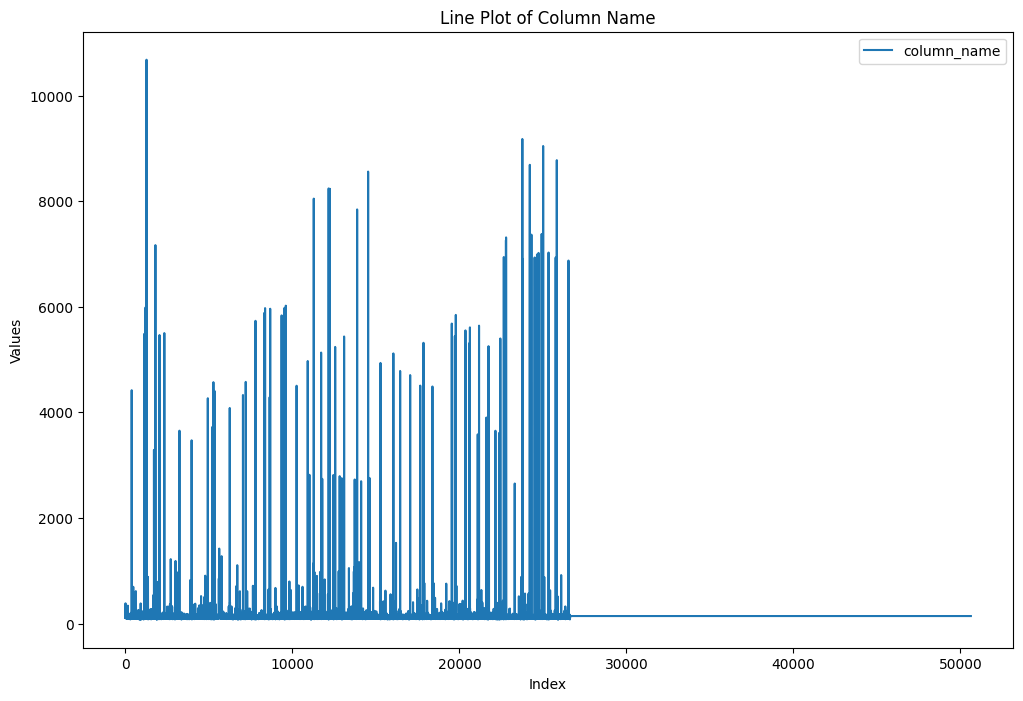

In [104]:
plt.figure(figsize=(12, 8))

plt.plot(combined_Data['FFT_Mag_01q0'], label='column_name')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of Column Name')
plt.legend()
plt.show()

# 5. Feature Extraction
___

In [105]:
def categorize_time_to_failure(t):
    if t < 1:
        return 1
    elif t < 8:
        return 2
    else:
        return 3

combined_Data['quake_category'] = combined_Data['time_to_failure'].apply(categorize_time_to_failure)
combined_Data

C:\Users\skynet\AppData\Local\Temp\ipykernel_15396\2321403809.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_Data['quake_category'] = combined_Data['time_to_failure'].apply(categorize_time_to_failure)


FFT_Mag_01q0  FFT_Mag_10q0  FFT_Mag_90q0  FFT_Mag_99q0  FFT_Mag_mean0  \
0        133.370418    379.989767   2099.323961   3454.405454    1158.604142   
1        101.463064    403.043357   2706.287890   4659.971868    1376.586871   
2        151.454194    425.323134   2487.224448   4043.233209    1305.790884   
3        105.571240    349.567502   1821.013388   2892.954016    1038.729255   
4        131.767622    388.357917   2239.528336   3588.816128    1213.050950   
...             ...           ...           ...           ...            ...   
50619    141.383800    454.414593   3211.341348   5510.187542    1601.012701   
50620    141.383800    454.414593   3211.341348   5510.187542    1601.012701   
50621    141.383800    454.414593   3211.341348   5510.187542    1601.012701   
50622    141.383800    454.414593   3211.341348   5510.187542    1601.012701   
50623    141.383800    454.414593   3211.341348   5510.187542    1601.012701   

       FFT_Mag_std0  FFT_Mag_max0  FFT_Phz_mean0  FFT_Phz_std0  \
0        768.254346  11238.366664      -0.012250      0.900691   
1        990.128586  10991.826903      -0.010392      0.915304   
2        882.537006  11014.068311      -0.019542      0.918202   
3        661.926156   9852.436660      -0.009640      0.904850   
4        842.284316  13054.367373       0.006269      0.907299   
...             ...           ...            ...           ...   
50619   1224.459568  13359.450955      -0.000114      0.906534   
50620   1224.459568  13359.450955      -0.000114      0.906534   
50621   1224.459568  13359.450955      -0.000114      0.906534   
50622   1224.459568  13359.450955      -0.000114      0.906534   
50623   1224.459568  13359.450955      -0.000114      0.906534   

       FFT_Mag_01q2500  FFT_Mag_10q2500  FFT_Mag_90q2500  FFT_Mag_99q2500  \
0           320.841247       918.445505      5283.078487      8347.266967   
1           401.527061      1220.848033      7759.743129     12122.234518   
2           409.000861      1379.782906      8213.592614     12904.320817   
3           205.126928       623.247138      3305.443616      4782.413289   
4           330.294872       985.700425      5792.019582      8809.843783   
...                ...              ...              ...              ...   
50619       382.226123      1216.188558      7005.437485     11210.852027   
50620       382.226123      1216.188558      7005.437485     11210.852027   
50621       382.226123      1216.188558      7005.437485     11210.852027   
50622       382.226123      1216.188558      7005.437485     11210.852027   
50623       382.226123      1216.188558      7005.437485     11210.852027   

       FFT_Mag_mean2500  FFT_Mag_std2500  FFT_Mag_max2500  FFT_Phz_mean2500  \
0           2932.763794      1758.860301     11254.298223          0.001134   
1           4077.131546      2639.682190     16685.885455         -0.007167   
2           4357.606872      2766.929215     18122.166119          0.010521   
3           1862.635646      1056.997898      6541.554812          0.007459   
4           3099.958281      1899.373493     10022.102061         -0.003593   
...                 ...              ...              ...               ...   
50619       3796.840594      2376.950306     15006.271849         -0.000136   
50620       3796.840594      2376.950306     15006.271849         -0.000136   
50621       3796.840594      2376.950306     15006.271849         -0.000136   
50622       3796.840594      2376.950306     15006.271849         -0.000136   
50623       3796.840594      2376.950306     15006.271849         -0.000136   

       FFT_Phz_std2500  FFT_Mag_01q5000  FFT_Mag_10q5000  FFT_Mag_90q5000  \
0             0.911589       558.071406      1504.122156      7125.207348   
1             0.905788       526.146099      1642.700133      8291.289881   
2             0.905158       936.309142      3092.053138     13919.299265   
3             0.919800       399.781210      1216.263114      6368.6052

In [106]:
x = combined_Data.drop(['quake_category'] , axis = 1)
y = combined_Data['quake_category']

In [107]:
X_train = X_train.astype(np.float64)
X_train.dtypes

0    float64
1    float64
2    float64
dtype: object

# 6. Splitting Data

In [130]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
X_train_filled = X_train.fillna(X_train.mean())

In [132]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (40499, 869)
y_train: (40499,)


In [133]:
X_train[np.abs(X_train) > 1e10] = 0

## Training Model

In [134]:
trained_model = RandomForestClassifier()
trained_model.fit(X_train , y_train)

RandomForestClassifier()

In [136]:
X_test[np.abs(X_test) > 1e10] = 0
y_pred = trained_model.predict(X_test)


## 6.2 Evaluation

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       427
           2       1.00      1.00      1.00      8421
           3       1.00      1.00      1.00      1277

    accuracy                           1.00     10125
   macro avg       1.00      1.00      1.00     10125
weighted avg       1.00      1.00      1.00     10125

